In [ ]:
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

In [ ]:
tamaño = ctrl.Antecedent(np.arange(0, 13, 1), 'tamaño')
tamaño['pequeño'] = fuzz.trapmf(tamaño.universe,[0,0,4,6])
tamaño['mediano'] = fuzz.trimf(tamaño.universe,[5,7,9])
tamaño['grande'] = fuzz.trapmf(tamaño.universe,[8,10,12,12])

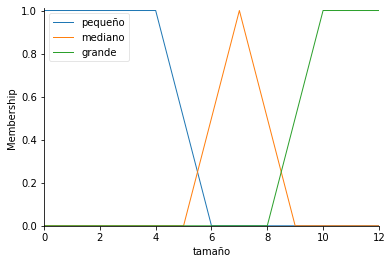

In [ ]:
tamaño.view()

In [ ]:
fibra = ctrl.Antecedent(np.arange(17, 34, 1), 'fibra')
fibra['bajo'] = fuzz.trapmf(fibra.universe,[26,30,33,33])
fibra['medio'] = fuzz.trimf(fibra.universe,[21,24,27])
fibra['alto'] = fuzz.trapmf(fibra.universe,[17,17,20,22])

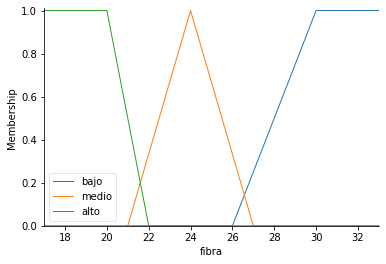

In [ ]:
fibra.view()

In [ ]:
uniformidad = ctrl.Antecedent(np.arange(0,101, 1), 'Uniformidad')
uniformidad['bajo'] = fuzz.trapmf(uniformidad.universe,[0,0,70,79])
uniformidad['medio'] = fuzz.trimf(uniformidad.universe,[75,83,92])
uniformidad['alto'] = fuzz.trapmf(uniformidad.universe,[90,95,100,100])

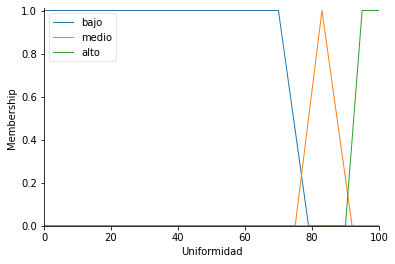

In [ ]:
uniformidad.view()

In [ ]:
finura = ctrl.Consequent(np.arange(0, 169, 1), 'Finura')
finura['Regular'] = fuzz.trapmf(finura.universe,[0,0,60,80])
finura['Fino'] = fuzz.trimf(finura.universe, [70,90,110])
finura['Extrafino']= fuzz.trapmf(finura.universe,[100,144,168,168])

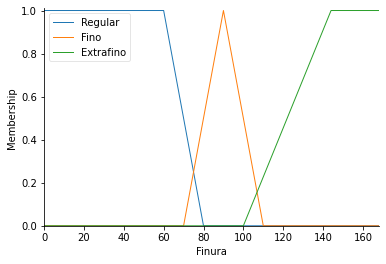

In [ ]:
finura.view()

Extra Fino

In [ ]:
regla1 = ctrl.Rule(tamaño['grande'] & fibra['alto']& uniformidad['alto'],finura['Extrafino'])
regla2 = ctrl.Rule(tamaño['grande'] & fibra['alto'] & uniformidad['medio'], finura['Extrafino'])
regla10 = ctrl.Rule(tamaño['mediano'] & fibra['alto'] & uniformidad['alto'], finura['Extrafino'])
regla4 = ctrl.Rule(tamaño['grande'] & fibra['medio'] & uniformidad['alto'], finura['Extrafino'])

Fino

In [ ]:
regla5 = ctrl.Rule(tamaño['grande'] & fibra['medio'] & uniformidad['medio'], finura['Fino'])
regla3 = ctrl.Rule(tamaño['grande'] & fibra['alto']& uniformidad['bajo'],finura['Fino'])
regla6 = ctrl.Rule(tamaño['grande'] & fibra['medio']& uniformidad['bajo'],finura['Fino'])
regla7 = ctrl.Rule(tamaño['grande'] & fibra['bajo']& uniformidad['alto'],finura['Fino'])
regla8 = ctrl.Rule(tamaño['grande'] & fibra['bajo']& uniformidad['medio'],finura['Fino'])
regla11 = ctrl.Rule(tamaño['mediano'] & fibra['alto'] & uniformidad['medio'], finura['Fino'])
regla12 = ctrl.Rule(tamaño['mediano'] & fibra['alto']& uniformidad['bajo'], finura['Fino'])
regla13 = ctrl.Rule(tamaño['mediano'] & fibra['medio'] & uniformidad['alto'], finura['Fino'])
regla14 = ctrl.Rule(tamaño['mediano'] & fibra['medio'] & uniformidad['medio'], finura['Fino'])
regla15 = ctrl.Rule(tamaño['mediano'] & fibra['medio']& uniformidad['bajo'], finura['Fino'])
regla16 = ctrl.Rule(tamaño['mediano'] & fibra['bajo']& uniformidad['alto'], finura['Fino'])
regla17 = ctrl.Rule(tamaño['mediano'] & fibra['bajo']& uniformidad['medio'], finura['Fino'])
regla19 = ctrl.Rule(tamaño['pequeño'] & fibra['alto'] & uniformidad['alto'], finura['Fino'])
regla20 = ctrl.Rule(tamaño['pequeño'] & fibra['alto'] & uniformidad['medio'], finura['Fino'])


Regular

In [ ]:
regla19 = ctrl.Rule(tamaño['grande'] & fibra['bajo']& uniformidad['bajo'],finura['Regular'])
regla21 = ctrl.Rule(tamaño['pequeño'] & fibra['alto']& uniformidad['bajo'], finura['Regular'])
regla22 = ctrl.Rule(tamaño['pequeño'] & fibra['medio'] & uniformidad['alto'], finura['Regular'])
regla23 = ctrl.Rule(tamaño['pequeño'] & fibra['medio'] & uniformidad['medio'], finura['Regular'])
regla24 = ctrl.Rule(tamaño['pequeño'] & fibra['medio']& uniformidad['bajo'], finura['Regular'])
regla25 = ctrl.Rule(tamaño['pequeño'] & fibra['bajo']& uniformidad['alto'], finura['Regular'])
regla26 = ctrl.Rule(tamaño['pequeño'] & fibra['bajo']& uniformidad['medio'], finura['Regular'])
regla27 = ctrl.Rule(tamaño['pequeño'] & fibra['bajo']& uniformidad['bajo'], finura['Regular'])
regla18 = ctrl.Rule(tamaño['mediano'] & fibra['bajo']& uniformidad['bajo'], finura['Regular'])


In [ ]:
finura_ctrl = ctrl.ControlSystem([regla1, regla2, regla3, regla4, regla5,regla6, regla7, regla8,regla10,regla11,regla12,regla13,regla14,regla15,regla16,regla17,regla18,regla19,regla20,regla21,regla22,regla23,regla24,regla25,regla26,regla27])
finura_sim = ctrl.ControlSystemSimulation(finura_ctrl)

In [ ]:
finura_sim.input['tamaño'] = 5
finura_sim.input['fibra'] = 28
finura_sim.input['Uniformidad'] = 67

In [ ]:
finura_sim.compute()
finura_sim.output

OrderedDict([('Finura', 37.55555555555557)])

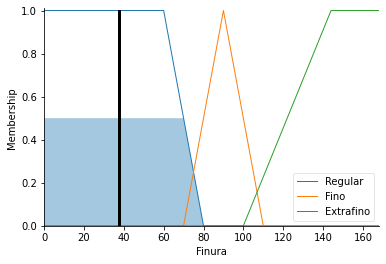

In [ ]:
finura.view(sim=finura_sim)